In [1]:
import sys
sys.path.append('../')
from mylib import eda
from mylib import utils

from pprint import pprint
import seaborn as sns

In [2]:
df = utils.read_data('../data/AmesHousing.txt')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 1. Data cleansing

### Заполнение пропущенных значений

In [3]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of objects: {}'.format(df.shape[0]))
print()

nan_features = eda.get_nan_features(df)
print('Total {} features with nan values'.format(len(nan_features)))
pprint(nan_features)

Number of features: 81
Number of objects: 2930

Total 27 features with nan values
{'Alley': 2732,
 'Bsmt Cond': 80,
 'Bsmt Exposure': 83,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Bsmt Qual': 80,
 'Bsmt Unf SF': 1,
 'BsmtFin SF 1': 1,
 'BsmtFin SF 2': 1,
 'BsmtFin Type 1': 80,
 'BsmtFin Type 2': 81,
 'Electrical': 1,
 'Fence': 2358,
 'Fireplace Qu': 1422,
 'Garage Area': 1,
 'Garage Cars': 1,
 'Garage Cond': 159,
 'Garage Finish': 159,
 'Garage Qual': 159,
 'Garage Type': 157,
 'Garage Yr Blt': 159,
 'Lot Frontage': 490,
 'Mas Vnr Area': 23,
 'Mas Vnr Type': 23,
 'Misc Feature': 2824,
 'Pool QC': 2917,
 'Total Bsmt SF': 1}


Видно, что признаки ***Alley, Fence, Misc Feature, Pool QC, Fireplace Qu*** имеют огромное число пропусков (почти все значения пропущенные). Также признак ***PID*** вряд ли содержит какую-то информацию. Поэтому имеет смысл их удалить из рассмотрения.

In [4]:
df.drop(columns=['Alley', 'Fence', 'Misc Feature', 'Pool QC', 'Fireplace Qu', 'PID'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

Сразу отметим некоторые неточности в типах данных.

* ***Ms SubClass*** - из описания является категориальным признаком, а следовательно должен иметь тип *object*;
* ***Garage Yr Blt*** - должен иметь тип *int*, т.к. год не может быть нецелым числом.

Поэтому сразу после заполнения пропущенных значений будет необходимо изменить тип данных у этих признаков.

В соответствии с описанием данных у некоторых признаков значение *NA* (что интерпретируется pandas как nan) является отдельной категорией, указывающей, например, на отсутствие гаража или цоколя. Поэтому отдельно обработаем такие случаи.

In [6]:
features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
           'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

for feature in features:
    df[feature].fillna('NA', inplace=True)
    
df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median(), inplace=True)

In [7]:
df['MS SubClass'] = df['MS SubClass'].astype('str')
df['Garage Yr Blt'] = df['Garage Yr Blt'].astype('int64')

Получим списки категориальных и числовых признаков. 

In [8]:
cat_features, float_features, int_features = eda.split_features(df)

print('Числовых признаков: {}'.format(len(float_features) + len(int_features)))
print('Категориальных признаков: {}'.format(len(cat_features)))

Числовых признаков: 35
Категориальных признаков: 39


Заполним пропущенные значения.

In [9]:
for feature in float_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

for feature in int_features:
    df[feature].fillna(df[feature].median(), inplace=True)

for feature in cat_features:
    df[feature].fillna('unk', inplace=True)

print('Незаполненных полей осталось {}'.format(df.isna().sum().max()))

Незаполненных полей осталось 0


### Поиск выбросов и аномальных значений

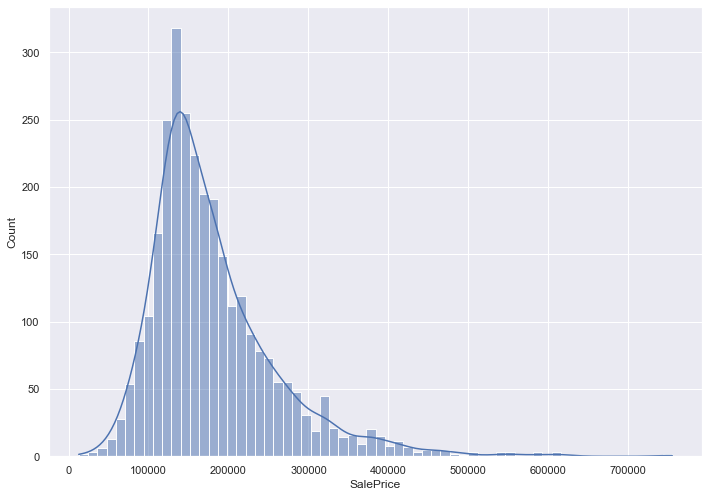

In [10]:
sns.histplot(df['SalePrice'], kde=True, color='b');

Исходя из построенной гистограммы, можно отметить тяжелый правый хвост распределения цены на недвижимость. Стоит удалить значения, превышающие 500k, для того, чтобы приблизить распределение цены к нормальному.

Теперь рассмотрим *pairplot'ы* числовых признаков по отношению к целевой переменной ***SalePrice***.

In [11]:
print('Число записей до: {}'.format(df.shape[0]))
df = df[df['SalePrice'] < 5e5]
print('Число записей после: {}'.format(df.shape[0]))

Число записей до: 2930
Число записей после: 2912


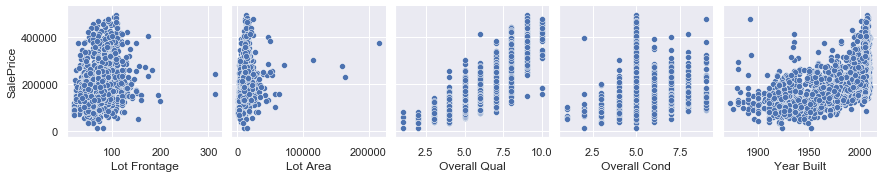

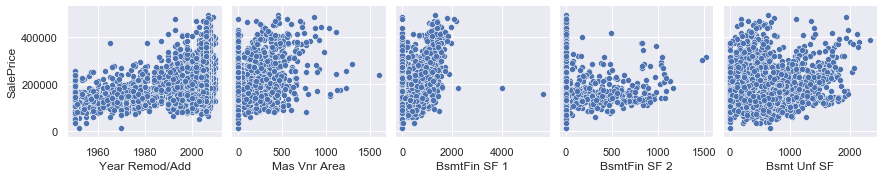

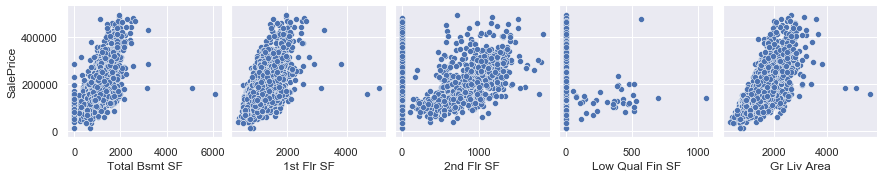

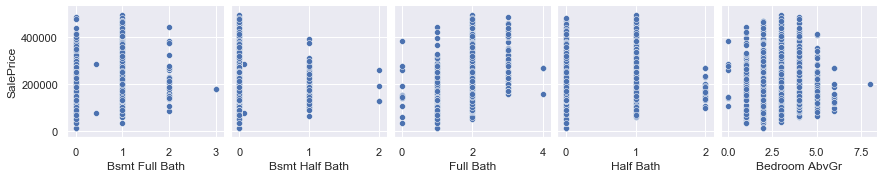

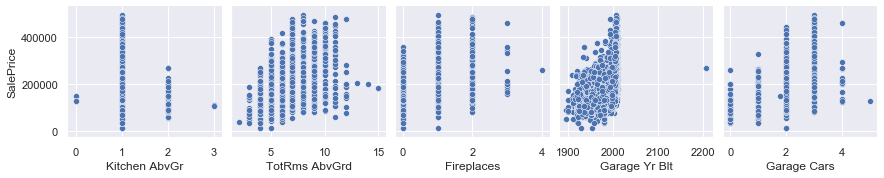

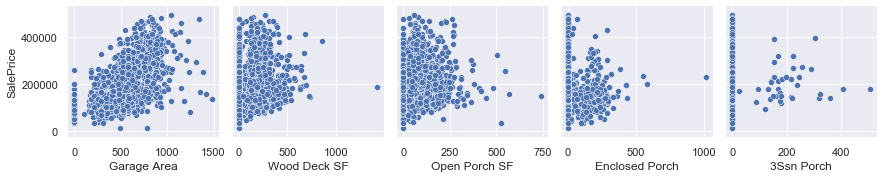

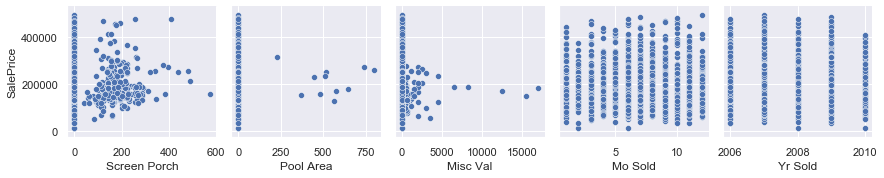

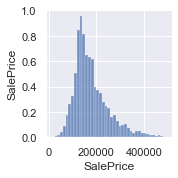

In [12]:
eda.plot_num_features_pairplots(df)

Глядя на полученные графики, можно выделить следующие выбросы/аномалии:

* ***Lot Frontage***: две крайние правые точки со значенями >300;
* ***Total Bsmt SF***: две правые точки со значением >5000;
* ***BsmtFin SF 1***: две правые точки со значением >3900;
* ***1st Flr SF***: две правые точки со значением >4000;
* ***Gr Liv Area***: три точки в правом нижнем углу выбиваются из общего тренда;
* ***Bsmt Full Bath***: две аномальные точки с нецелочисленным значением и выброс в виде единственной точки со значением 3;
* ***Bsmt Half Bath***: две аномальные точки с нецелочисленным значением и три выброса со значением 2;
* ***Full Bath***: две точки со значением 4;
* ***Bedroom AbvGr***: точка со значением >7.5;
* ***Ktchen AbvGr***: две точки со значением 0 и одна со значением 3;
* ***TotRms AbvGr***: три точки со значениями >12;
* ***Fireplaces***: точка со значением 4;
* ***Garage Yr Blt***: аномальная точка со значением 2207 (скорее всего опечатка);
* ***Garage Cars***: аномальная точка с нецелочисленным значением 1.76, а также выброс в виде значения 5;
* ***Wood Deck SF***: крайняя правая точка со значением >1000;
* ***Enclosed Porch***: правая точка со значением >1000.

In [13]:
print('Число записей до: {}'.format(df.shape[0]))

df = df[df['Lot Frontage'] < 300]
df = df[df['Total Bsmt SF'] < 5000]
df = df[df['BsmtFin SF 1'] < 3900]
df = df[df['1st Flr SF'] < 4000]
df = df[df['Gr Liv Area'] < 4500]
df = df[(df.index != 1342) & (df.index != 1498)]
df = df[df['Bsmt Full Bath'] < 3]
df['Bsmt Full Bath'].astype('int64')
df = df[df['Bsmt Half Bath'] < 2]
df['Bsmt Half Bath'].astype('int64')
df = df[df['Full Bath'] < 4]
df = df[df['Bedroom AbvGr'] < 7.5]
df = df[(df['Kitchen AbvGr'] > 0) & (df['Kitchen AbvGr'] < 3)]
df = df[df['TotRms AbvGrd'] <= 12]
df = df[df['Fireplaces'] < 4]
df = df[df['Garage Yr Blt'] < 2207]
df = df[df.index != 2237]
df['Garage Cars'].astype('int64')
df = df[df['Wood Deck SF'] < 1000]
df = df[df['Enclosed Porch'] < 1000]

print('Число записей после: {}'.format(df.shape[0]))

Число записей до: 2912
Число записей после: 2887


## 2. EDA

### Корреляционный анализ и отбор признаков

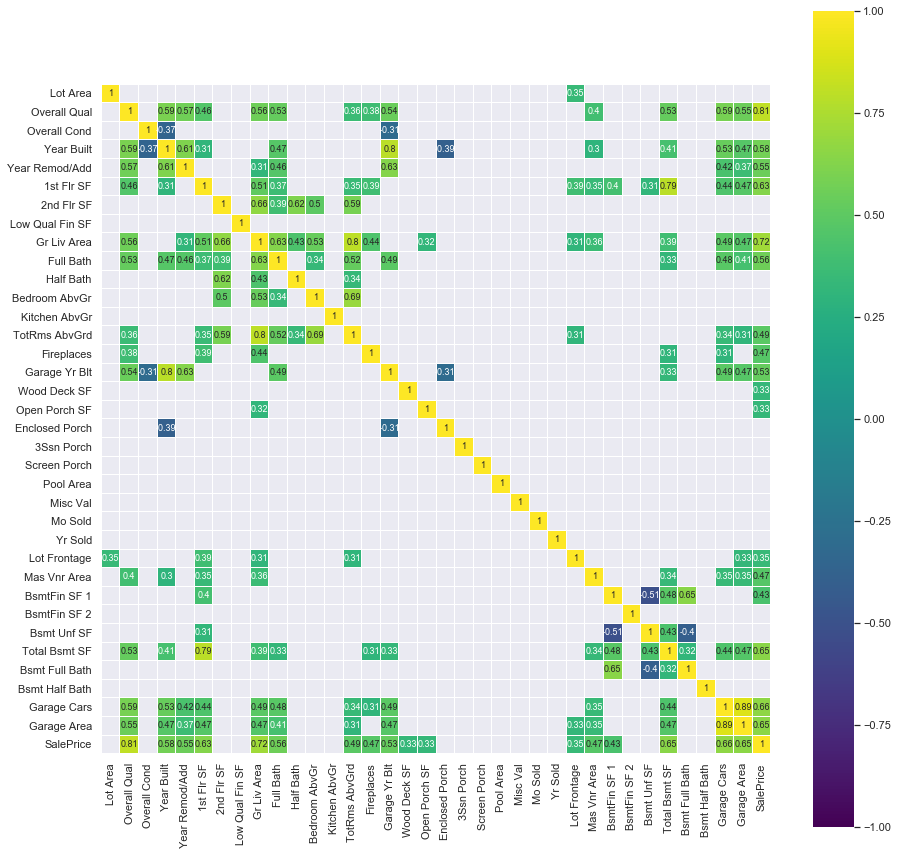

In [14]:
eda.plot_corr(df, int_features+float_features+['SalePrice'])

Сразу учтем наиболее сильные корреляции. Так, например, признаки ***Garage Cars*** и ***Garage Area*** коррелируют с коэффициентом 0.89 и коррелируют с ***SalePrice*** с примерно равными коэффициентами. Имеет смысл оставить только ***Garage Area***.

Cильно коррелируют ***TotRms AbvGrd*** и ***Gr Liv Area***. Имеет смысл оставить второй признак, т.к. он лучше коррелирует с предсказываемой ценой.

Еще одной тройкой значимо коррелирующих признаков являются ***Garage Yr Blt, Year Built, Year Remod/Add***. Т.к. второй сильнее коррелирует с ***SalePrice***, то оставим его.

In [15]:
df.drop(columns=['Garage Cars', 'TotRms AbvGrd', 'Garage Yr Blt', 'Year Remod/Add'], inplace=True)

Если посмотреть на построенные выше *pairplot'ы*, то можно заметить сильную схожесть в разбросе значений признаков ***BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF*** и ***Total Bsmt SF***. Посмотрим на корреляцию последнего с суммой первых трех.

In [16]:
df['Total Bsmt SF'].corr(df.loc[:, ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']].sum(axis=1))

1.0

Получили довольно интересный результат. Получается, что нам достаточно лишь одного признака ***Total Bsmt SF***, а остальные можно удалить. Также стоит удалить ***1st Flr SF*** в связи сильной корреляции.

In [17]:
df.drop(columns=['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', '1st Flr SF'], inplace=True)
print(df.shape)

(2887, 67)


Теперь оставим только те признаки, которые коррелируют с целевой переменной с коэффициентом не ниже 0.3.

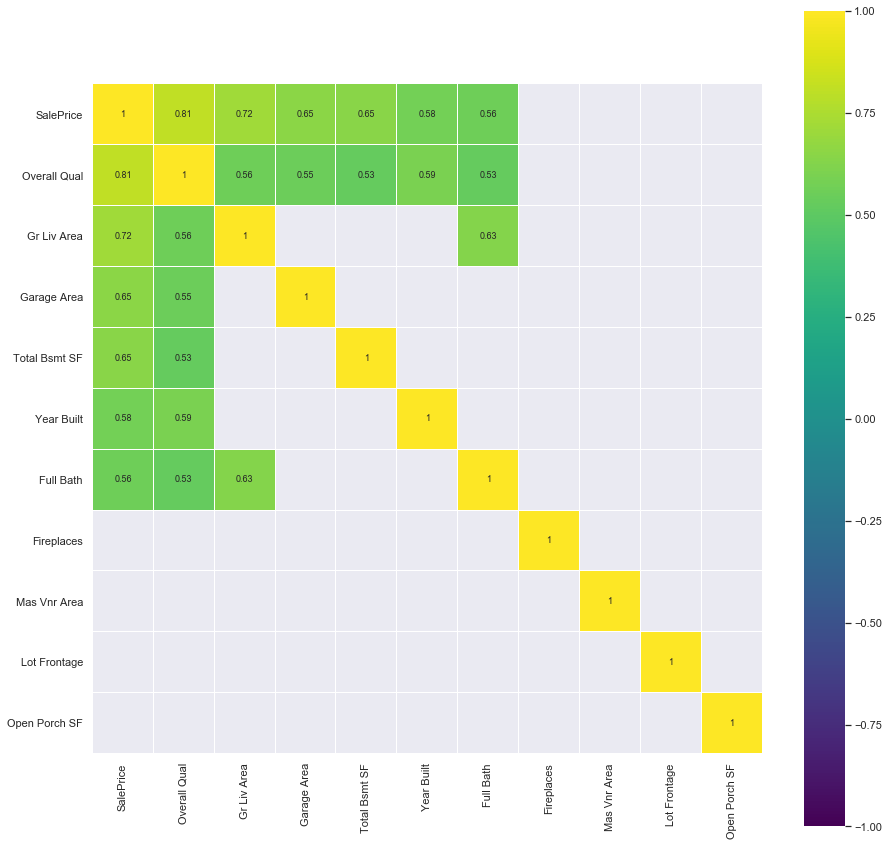

In [18]:
_, float_features, int_features = eda.split_features(df)
num_features = int_features + float_features + ['SalePrice']
value_num_features = df[num_features].corr().nlargest(11, 'SalePrice').index

eda.plot_corr(df, value_num_features, 0.5)

Пока можно оставить текущий набор признаков. Стоит отметить, что ***Overall Qual*** довольно сильно коррелирует с 5 признаками, а также ***Gr Liv Area*** коррелирует с еще одним. Все это может вызвать проблему мультиколлинеарности, но о ее влиянии можно будет сказать после обучения первой модели.

In [19]:
num_features = list(value_num_features)

Теперь рассмотрим подробнее категориальные признаки.

In [20]:
df[cat_features]

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
2,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
4,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
5,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
2927,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2928,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,NA,NA,NA,Y,WD,Normal


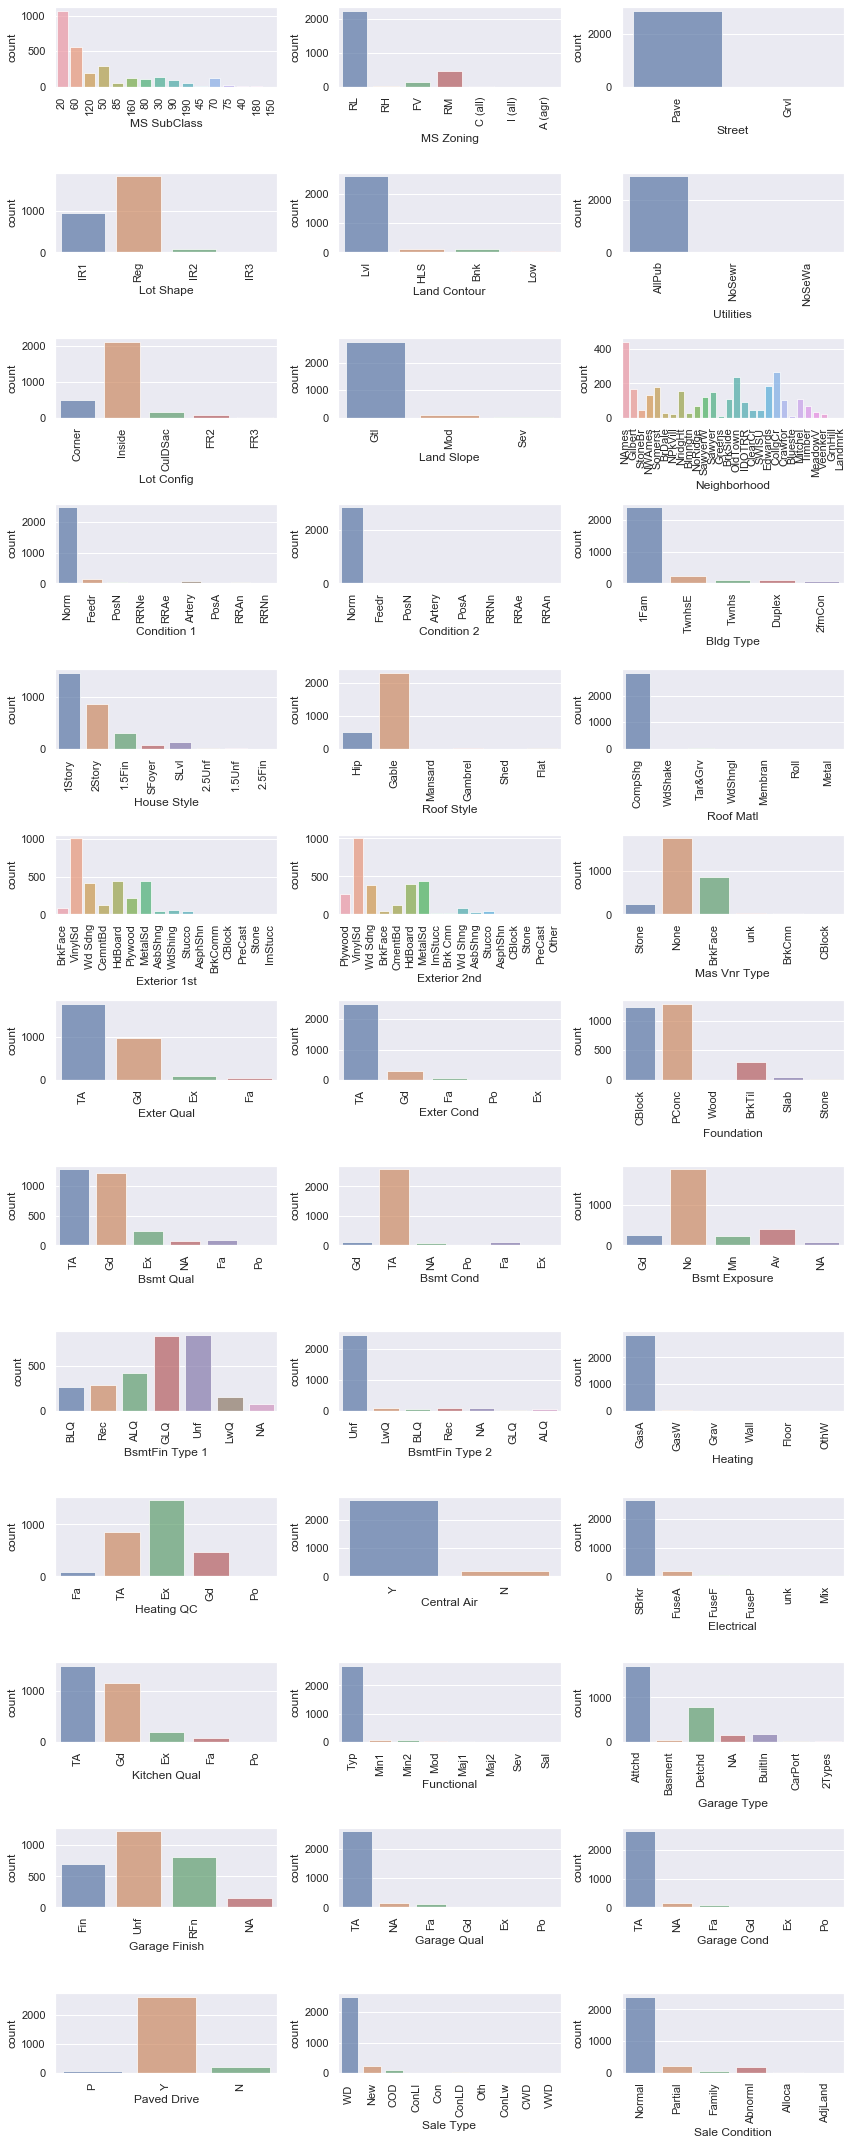

In [21]:
eda.plot_cat_features_countplots(df)

Достаточно много признаков имеют почти вырожденные распределения по своим категориям, поэтому они вряд ли несут какую-то полезную информацию. Ниже перечислены такие признаки:
* ***Street***
* ***Utilities***
* ***Land Slope***
* ***Condition 1***
* ***Condition 2***
* ***Roof Matl***
* ***Heating***
* ***Electrical***
* ***Functional***
* ***Garage Qual***
* ***Garage Cond***
* ***Sale Type***

Имеет смысл избавиться от них.

In [22]:
df.drop(columns=['Street', 'Utilities', 'Land Slope', 'Condition 1', 'Condition 2', 'Roof Matl',
                'Heating', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Sale Type'],
       inplace=True)

Далее, вооружившись детальным описанием каждого признака, некоторые из них можно закодировать рангом. Приведем список таких признаков:
* ***Exter Qual***
* ***Exter Cond***
* ***Bsmt Qual***
* ***Bsmt Cond***
* ***Bsmt Exposure***
* ***BsmtFin Type 1***
* ***BsmtFin Type 2***
* ***Heating QC***
* ***Kitchen Qual***
* ***Garage Finish***

Проведем кодировку.

In [23]:
cat_dict1 = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'unk': 0,
    'NA': 0
}

cat_dict2 = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'NA': 0
}
cat_dict3 = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0
}
cat_dict4 = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'NA': 0,
}

In [24]:
df['Exter Qual'] = df['Exter Qual'].apply(lambda x: cat_dict1[x])
df['Exter Cond'] = df['Exter Cond'].apply(lambda x: cat_dict1[x])
df['Bsmt Qual'] = df['Bsmt Qual'].apply(lambda x: cat_dict1[x])
df['Bsmt Cond'] = df['Bsmt Cond'].apply(lambda x: cat_dict1[x])
df['Bsmt Exposure'] = df['Bsmt Exposure'].apply(lambda x: cat_dict2[x])
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].apply(lambda x: cat_dict3[x])
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].apply(lambda x: cat_dict3[x])
df['Heating QC'] = df['Heating QC'].apply(lambda x: cat_dict1[x])
df['Kitchen Qual'] = df['Kitchen Qual'].apply(lambda x: cat_dict1[x])
df['Garage Finish'] = df['Garage Finish'].apply(lambda x: cat_dict4[x])

In [25]:
features = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
           'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Garage Finish']

num_features.extend(features)

cat_features, _, _ = eda.split_features(df)
print('Категориальных признаков: {}'.format(len(cat_features)))
print('Числовых признаков: {}'.format(len(num_features)))

Категориальных признаков: 17
Числовых признаков: 21


In [27]:
clean_df = eda.encode_features(df, num_features, cat_features)
clean_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Year Built,Full Bath,Fireplaces,Mas Vnr Area,Lot Frontage,Open Porch SF,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Garage Finish,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,...,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_unk,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,6,1656,528.0,1080.0,1960,1,2,112.0,141.0,62,3,3,3,4,4,4,1,2,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,105000,5,896,730.0,882.0,1961,1,0,0.0,80.0,0,3,3,3,3,1,3,2,3,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,172000,6,1329,312.0,1329.0,1958,1,0,108.0,81.0,36,3,3,3,3,1,5,1,3,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,244000,7,2110,522.0,2110.0,1968,2,2,0.0,93.0,0,4,3,3,3,1,5,1,5,5,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,189900,5,1629,482.0,928.0,1997,2,1,0.0,74.0,34,3,3,4,3,1,6,1,4,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [28]:
clean_df.to_csv('../data/clean_data.csv', index=False)